# WORKSHOP 2

------------

**<u>GRUPO 4<u>**

Digital House

link git hub: https://github.com/grupo4dhds/grupo4_git.git

--------------

## CONTENIDO


**items celda 4:**
	
	- 1. LECTURA DEL DATASET


	- 2. PRIMER MODULO
    
    * Chequeo de informacion
        * Eliminacion place_name = Capital Federal, state_name == place_name == 'Capital Federal', not relevant
        * Eliminacion de datos nulos en superficie
        * Seleccion de la muestra: mask_muetra
    * Obtencion de la muestra
        * Creacion muestra: data_nuevo
        * Verificacion inicial con statmodels

	- 3. SEGUNDO MODULO
 
    * Definimos el modelo, definimos el feature y el vector prediccion, hacemos la separacion de la muestra de entrenamiento y la de testeo, entrenamiento del modelo, colocacion de etiquetas: Creacion vector prediccion: ypred
    * Evaluacion de la performance, MAE, MSE, RMSE, R2
    * cross_val_score()
    * Segundo modelo:

    - Reacondicionamiento del dataset: data_nuevo_surface_covered
    - Creacion de feature y vector prediccion, creacion del modelo(linreg), entrenamiento algoritmo:
        - modelo de toda la muestra: est
        - modelo de la muestra de entrenamiento: linreg
    - cross_validation(): medidas estadisticas: media y std



In [42]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [43]:
data = pd.read_csv('data_workshop_2.csv')


warnings.filterwarnings('ignore')
data.head(2)

,Unnamed: 0,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,place_name_2,floor,rooms,expenses,regex1,regex2,direccion,above_mean
0,2,apartment,Mataderos,Capital Federal,72000.0,USD,55.0,55.0,1309.090909,Mataderos,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,5189,apartment,Mataderos,Capital Federal,67000.0,USD,40.0,28.0,1675.000000,Mataderos,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [44]:
data

,Unnamed: 0,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,place_name_2,floor,rooms,expenses,regex1,regex2,direccion,above_mean
0,2,apartment,Mataderos,Capital Federal,72000.0,USD,55.0,55.0,1309.090909,Mataderos,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,5189,apartment,Mataderos,Capital Federal,67000.0,USD,40.0,28.0,1675.000000,Mataderos,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,6450,apartment,Mataderos,Capital Federal,90000.0,USD,52.0,48.0,1730.769231,Mataderos,NaN,NaN,200.0,NaN,NaN,NaN,0.0
3,7725,apartment,Mataderos,Capital Federal,88000.0,USD,50.0,38.0,1760.000000,Mataderos,NaN,2.0,500.0,NaN,NaN,NaN,0.0
4,8339,apartment,Mataderos,Capital Federal,93600.0,USD,51.0,46.0,1835.294118,Mataderos,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21429,14653,store,Ciudadela,Bs.As. G.B.A. Zona Oeste,99000.0,USD,NaN,105.0,942.857143,Ciudadela,NaN,NaN,NaN,estrategico,NaN,NaN,NaN
21430,56361,store,Ciudadela,Bs.As. G.B.A. Zona Oeste,85000.0,USD,87.0,87.0,977.011494,Ciudadela,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21431,56408,store,Ciudadela,Bs.As. G.B.A. Zona Oeste,320000.0,USD,180.0,180.0,1777.777778,Ciudadela,NaN,NaN,NaN,estrategico,NaN,NaN,NaN
21432,36148,store,Merlo,Bs.As. G.B.A. Zona Oeste,270000.0,USD,375.0,333.0,720.000000,otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data.property_type.value_counts()

apartment    15942
house         2583
PH            2212
store          697
Name: property_type, dtype: int64

------------------
**Primer modelo**

* Chequeo de informacion
* Eliminacion place_name = Capital Federal, state_name == place_name == 'Capital Federal', not relevant
* Eliminacion de datos nulos en superficie
* Seleccion de la muestra: mask_muetra

**Obtencion de la muestra**

* Creacion muestra: data_nuevo

In [46]:
data.columns

Index(['Unnamed: 0', 'property_type', 'place_name', 'state_name', 'price',
       'currency', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'place_name_2', 'floor', 'rooms', 'expenses',
       'regex1', 'regex2', 'direccion', 'above_mean'],
      dtype='object')

In [47]:
print(data.shape)
data_dropna_surface_total=data.dropna(subset=['surface_total_in_m2'])
data_dropna_surface_total.state_name.value_counts()

(21434, 17)


Capital Federal                 9984
Bs.As. G.B.A. Zona Norte        2622
Bs.As. G.B.A. Zona Sur          1879
Bs.As. G.B.A. Zona Oeste        1128
Buenos Aires Costa Atlántica     941
Name: state_name, dtype: int64

In [48]:
mask1=data_dropna_surface_total.state_name == 'Capital Federal'
#mask2=data_dropna_surface_total.property_type == 'apartment' 
#mask3=data_dropna_surface_total.property_type =='store'
data_dropna_surface_total.loc[mask1,:].place_name.value_counts()[0:5]

Palermo         1315
Villa Crespo     913
Flores           877
Recoleta         742
Barrio Norte     665
Name: place_name, dtype: int64

In [49]:
mask31=data_dropna_surface_total.place_name =='Palermo'
mask32=data_dropna_surface_total.place_name =='Palermo Hollywood'
mask33=data_dropna_surface_total.place_name =='Palermo Soho'
mask34=data_dropna_surface_total.place_name =='Palermo Chico'
mask41=data_dropna_surface_total.place_name =='Recoleta'
mask42=data_dropna_surface_total.place_name =='Barrio Norte'
mask43=data_dropna_surface_total.place_name =='Retiro'

mask_muestra = ['Palermo', 'Palermo Hollywood', 'Palermo Soho', 'Palermo Chico', 'Recoleta', 'Barrio Norte', 'Retiro']


data_nuevo=data_dropna_surface_total.loc[(mask31 | mask32 | mask33 | mask34 | mask41 | mask42 | mask43),:]
#data_nuevo=data_dropna_surface_total.loc[(mask2 | mask3) & (mask31 | mask32 | mask33 | mask34 | mask41 | mask42 | mask43),:]
distribucion_data_nuevo=data_nuevo.place_name.value_counts().sum()
print(distribucion_data_nuevo)
data_nuevo.property_type.value_counts()

3485


apartment    3374
store          82
PH             22
house           7
Name: property_type, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades')

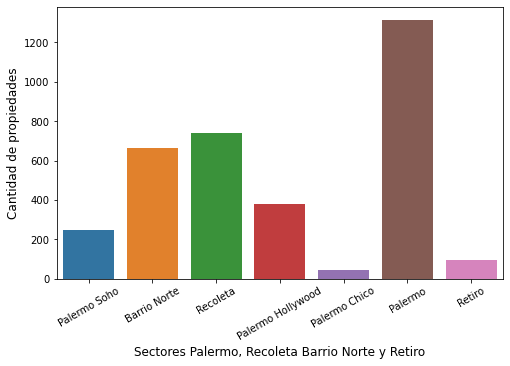

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='place_name',data=data_nuevo)
plt.xticks(rotation=30)
ax = plt.axes()
ax.set_xlabel('Sectores Palermo, Recoleta Barrio Norte y Retiro', fontsize=12)
ax.set_ylabel('Cantidad de propiedades',fontsize=12)

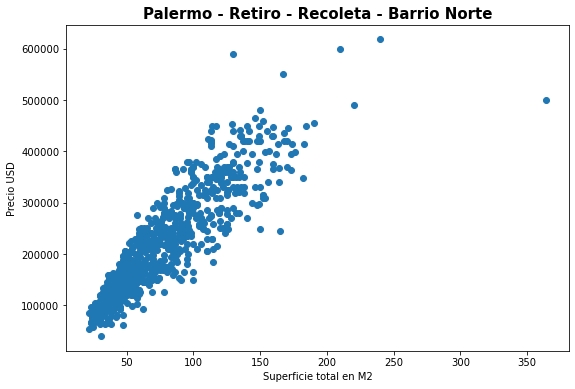

In [51]:
fig = plt.figure(figsize=(9,6))
# creo los axes
ax = plt.axes()
# dibujo en axes:

def get_sample(data, n_sample, replace=False):
    # SUPONE QUE NO HAY REPOSICION COMO DEFAULT
    random_generator = np.random.default_rng()
    index_sample = random_generator.choice(data.index, size = n_sample, replace=replace)
    data_sample = data.loc[index_sample]
    return data_sample

"""
Tener un diccionario que almacene muestra, en este caso uno le dice el numero de muestras y luego contando a partir de 1 en adelante un diccionario te guarda en los keys Muestra_A.keys(): 'muestra_1', 'muestra_2', 'muestra_3'
"""
data_nuevo_sample = get_sample(data_nuevo, 1000, replace=False)

plt.scatter(data_nuevo_sample.surface_total_in_m2,data_nuevo_sample.price)
plt.title('Palermo - Retiro - Recoleta - Barrio Norte',fontweight='bold',size=15)
plt.ylabel('Precio USD')
plt.xlabel('Superficie total en M2')
plt.show()


def identificar_valores_extremos():
    pass

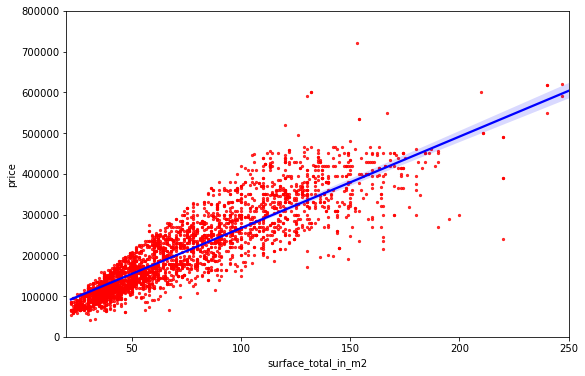

In [52]:
fig = plt.figure(figsize=(9,6))
sns.regplot(data = data_nuevo, x = "surface_total_in_m2", y = "price", 
            ci = 90,
            scatter_kws = {"color": "red", 's': 5},
            line_kws = {"color": "blue"});
plt.xlim(20,250)
plt.ylim(bottom=0,top=.8e6);

**VERIFICACION INICIAL**

In [53]:
# STAT MODELS

X_t = np.array(data_nuevo.surface_total_in_m2, ndmin=2)
X = np.transpose(X_t)
y = data_nuevo.price

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:00:22   Log-Likelihood:                -42586.
No. Observations:                3485   AIC:                         8.518e+04
Df Residuals:                    3483   BIC:                         8.519e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.252e+04   1704.045     24.952      0.0

---------------------------------
**modulo 2**

* Definimos el modelo, definimos el feature y el vector prediccion, hacemos la separacion de la muestra de entrenamiento y la de testeo, entrenamiento del modelo, colocacion de etiquetas: Creacion vector prediccion: ypred
* Evaluacion de la performance, MAE, MSE, RMSE, R2
* cross_val_score()
* Segundo modelo:

    - Reacondicionamiento del dataset: data_nuevo_surface_covered
    - Creacion de feature y vector prediccion, creacion del modelo(linreg), entrenamiento algoritmo:
        - modelo de toda la muestra: est
        - modelo de la muestra de entrenamiento: linreg
    - cross_validation(): medidas estadisticas: media y std

In [54]:
model = LinearRegression(fit_intercept=True)
feature_cols = ['surface_total_in_m2']
X=data_nuevo[feature_cols]
y = data_nuevo.price

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtrain)

In [55]:
print ('MAE:', mean_absolute_error(ytrain, ypred).round(2))
print ('MSE:', mean_squared_error(ytrain, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytrain, ypred)).round(2))
print ('R2:', r2_score(ytrain, ypred).round(2))
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=LinearRegression(), X=Xtrain, y=ytrain, cv=3).mean()

MAE: 35200.15
MSE: 2474210422.11
RMSE: 49741.44
R2: 0.77


0.7665136808127774

In [56]:
cross_val_score(estimator=LinearRegression(), X=Xtrain, y=ytrain, cv=3).std()

0.02456299178163648

**Segundo modelo: Data Palermo con superficie cubierta y descubierta**

In [57]:
data_nuevo['surface_covered_in_m2'].isna().sum()
data_nuevo_surface_covered=data_nuevo.dropna(subset=['surface_covered_in_m2'])
data_nuevo_surface_covered.shape

(3287, 17)

In [58]:
data_nuevo_surface_covered['surface_uncovered_in_m2']=data_nuevo_surface_covered['surface_total_in_m2']-data_nuevo_surface_covered['surface_covered_in_m2']
feature_cols = ['surface_covered_in_m2','surface_uncovered_in_m2']
X = data_nuevo_surface_covered[feature_cols]
y = data_nuevo_surface_covered.price

linreg = LinearRegression()
est=linreg.fit(X, y) #modelo de toda la muestra

# Imprimimos coeficientes
print (linreg.intercept_)
list(zip(feature_cols, linreg.coef_))

43291.62084029647


[('surface_covered_in_m2', 2308.4656687565775),
 ('surface_uncovered_in_m2', 1556.3296518807979)]

In [59]:
est.intercept_

43291.62084029647

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,shuffle=False)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train).round(2)

In [61]:
print ('MAE:', mean_absolute_error(y_train, y_pred).round(2))
print ('MSE:', mean_squared_error(y_train, y_pred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)).round(2))
print ('R2:', r2_score(y_train, y_pred).round(2))

MAE: 31474.89
MSE: 1731395384.08
RMSE: 41610.04
R2: 0.82


In [62]:
cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=3).mean()

0.8116310420355147

In [63]:
cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=3).std()

0.01540442829410576

**ANALISIS POR STATMODELS**

In [64]:
feature_cols=['surface_covered_in_m2','surface_uncovered_in_m2']
X=data_nuevo_surface_covered[feature_cols]
y= data_nuevo_surface_covered.price
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     5828.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:00:22   Log-Likelihood:                -40088.
No. Observations:                3287   AIC:                         8.018e+04
Df Residuals:                    3284   BIC:                         8.020e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

Text(0.5, 0, 'Superficie Descubierta')

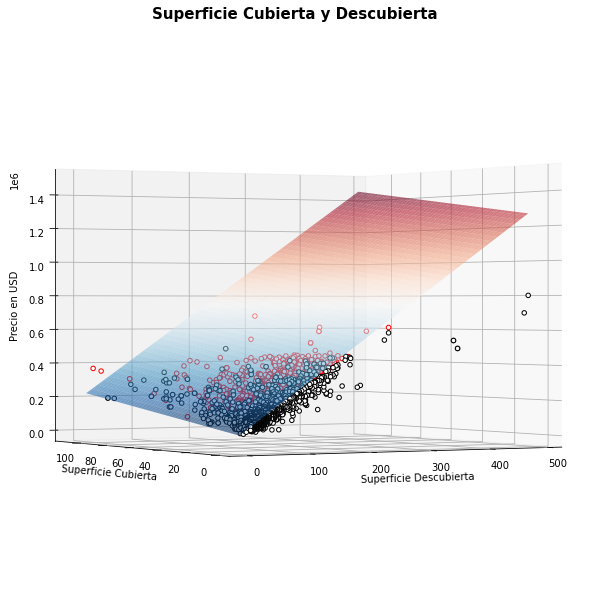

In [65]:
surf_cov, surf_uncov=np.meshgrid(np.linspace(data_nuevo_surface_covered.surface_covered_in_m2.min(),data_nuevo_surface_covered.surface_covered_in_m2.max(),100),np.linspace(data_nuevo_surface_covered.surface_uncovered_in_m2.min(),data_nuevo_surface_covered.surface_uncovered_in_m2.max(),100))
Z=linreg.coef_[0]*surf_cov+linreg.coef_[1]*surf_uncov+linreg.intercept_
fig=plt.figure(figsize=(12,8))
from mpl_toolkits.mplot3d import Axes3D
ax=Axes3D(fig, azim=-120,elev=0)
surf=ax.plot_surface(surf_cov,surf_uncov,Z,cmap=plt.cm.RdBu_r,alpha=0.6)
resid=y-model.predict(X)
ax.scatter(X[resid>=0].surface_covered_in_m2,X[resid>=0].surface_uncovered_in_m2,y[resid>=0], color='red',alpha=1.0,facecolor='white')
ax.scatter(X[resid<0].surface_covered_in_m2,X[resid<0].surface_uncovered_in_m2,y[resid<0], color='black',alpha=1.0,facecolor='white')
ax.set_title('Superficie Cubierta y Descubierta',fontweight='bold',size=15)
ax.set_zlabel('Precio en USD')
ax.set_ylabel('Superficie Cubierta')
ax.set_xlabel('Superficie Descubierta')

**REGULARIZACION**

**Segundo modelo: Data Palermo con superficie cubierta y descubierta con regularizacion Ridge**

In [66]:
scaler = StandardScaler()
print(X.surface_covered_in_m2.mean(),X.surface_covered_in_m2.std())
print(X.surface_uncovered_in_m2.mean(),X.surface_uncovered_in_m2.std())
X_std = scaler.fit_transform(X)
print(X)
print(X_std)

64.25768177669607 37.44946175985987
8.095223608153331 12.53697143542111
       const  surface_covered_in_m2  surface_uncovered_in_m2
102      1.0                   30.0                     20.0
103      1.0                   31.0                     11.0
104      1.0                   38.0                      0.0
105      1.0                   38.0                      0.0
106      1.0                   65.0                      8.0
...      ...                    ...                      ...
20995    1.0                   62.0                      0.0
20996    1.0                   36.0                      0.0
20998    1.0                  200.0                      0.0
20999    1.0                  132.0                      0.0
21000    1.0                  132.0                      0.0

[3287 rows x 3 columns]
[[ 0.         -0.91491019  0.94971802]
 [ 0.         -0.88820347  0.23173207]
 [ 0.         -0.70125646 -0.64580631]
 ...
 [ 0.          3.62523158 -0.64580631]
 [ 0.     

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 3)

model_ridge_cv = linear_model.RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, normalize=False, cv=10)

model_fit_ridge_cv = model_ridge_cv.fit(X_train, y_train)

print(model_fit_ridge_cv.alpha_)

print(model_fit_ridge_cv.best_score_)

0.3
0.7728810636318615


In [68]:
best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True, normalize = False)
model_fit_ridge = model_ridge.fit(X_train, y_train)
print(model_fit_ridge.coef_)
print(model_fit_ridge.intercept_)
print(model_fit_ridge.score(X_train, y_train))
print(X_test)

[    0.         84580.89615867 20935.99033117]
204901.96106891456
0.7743088942211567
[[ 0.         -0.91491019 -0.40647766]
 [ 0.          1.22162711 -0.64580631]
 [ 0.          0.15335846 -0.24692523]
 ...
 [ 0.         -0.22053556 -0.40647766]
 [ 0.          2.31660248 -0.64580631]
 [ 0.          0.2067719  -0.64580631]]


In [69]:
model_fit_ridge.score(X_test, y_test)

0.793326726616934

In [70]:
y_pred = model_fit_ridge.predict(X_test)
y_pred[0:10]

array([119008.02516038, 294707.68240171, 212703.53313107, 439084.15886925,
       174987.14870556, 279306.0435682 , 353931.33656414, 194632.50917694,
       258962.60322216, 362090.59189864])

In [71]:
y_test[0:10]

9207     110000.0
2912     205000.0
4021     230000.0
4331     398000.0
9328     190000.0
9269     350000.0
10121    389000.0
3367     159000.0
2956     285000.0
4009     395000.0
Name: price, dtype: float64

In [72]:
print ('MAE:', mean_absolute_error(y_test, y_pred).round(2))
print ('MSE:', mean_squared_error(y_test, y_pred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
print ('R2:', r2_score(y_test, y_pred).round(2))
print(cross_val_score(estimator=linear_model.Ridge(alpha = best_alpha, fit_intercept = True, normalize = False), X=X_train, y=y_train, cv=3).mean())

MAE: 33549.7
MSE: 2018472087.23
RMSE: 44927.41
R2: 0.79
0.7686800137756832


**Modelo de regresion con dummies**

In [73]:
data_nuevo_dummies=pd.get_dummies(data_nuevo, columns=['place_name'],prefix="sector")
        

In [74]:
data_nuevo_dummies.head()

,Unnamed: 0,property_type,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,place_name_2,floor,...,regex2,direccion,above_mean,sector_Barrio Norte,sector_Palermo,sector_Palermo Chico,sector_Palermo Hollywood,sector_Palermo Soho,sector_Recoleta,sector_Retiro
102,13,apartment,Capital Federal,111700.0,USD,50.0,30.0,2234.000000,Palermo Soho,NaN,...,NaN,NaN,0.0,0,0,0,0,1,0,0
103,14,apartment,Capital Federal,147900.0,USD,42.0,31.0,3521.428571,Palermo Soho,NaN,...,NaN,NaN,0.0,0,0,0,0,1,0,0
104,1631,apartment,Capital Federal,90000.0,USD,38.0,38.0,2368.421053,Palermo Soho,NaN,...,exclusivo,NaN,0.0,0,0,0,0,1,0,0
105,4335,apartment,Capital Federal,95000.0,USD,38.0,38.0,2500.000000,Palermo Soho,NaN,...,exclusivo,NaN,0.0,0,0,0,0,1,0,0
106,5434,apartment,Capital Federal,218000.0,USD,73.0,65.0,2986.301370,Palermo Soho,NaN,...,NaN,NaN,1.0,0,0,0,0,1,0,0


In [75]:
data_nuevo_dummies.shape[0]

3485

In [76]:
feature_cols = ['surface_total_in_m2', 'sector_Palermo','sector_Palermo Chico', 'sector_Palermo Hollywood', 'sector_Palermo Soho','sector_Recoleta','sector_Retiro']
X = data_nuevo_dummies[feature_cols]
y = data_nuevo_dummies.price
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X, y)
print (linreg.intercept_)

Coef_Dummies=pd.Series(list(zip(feature_cols, linreg.coef_)))
type(Coef_Dummies)
print(feature_cols)
print(linreg.coef_)

36386.7042426017
['surface_total_in_m2', 'sector_Palermo', 'sector_Palermo Chico', 'sector_Palermo Hollywood', 'sector_Palermo Soho', 'sector_Recoleta', 'sector_Retiro']
[  2235.37802247   8145.26261564  42302.17734857   5117.14349481
  -4908.35017777  15870.30058005 -15349.98976319]


## ESTE GRAFICO NECESITA QUE DIGA EL VALOR EXACTO EN LA PUNTA DE LA COLUMNA

Text(0.5, 1.0, 'Coeficientes de regresion con dummies segun place_name')

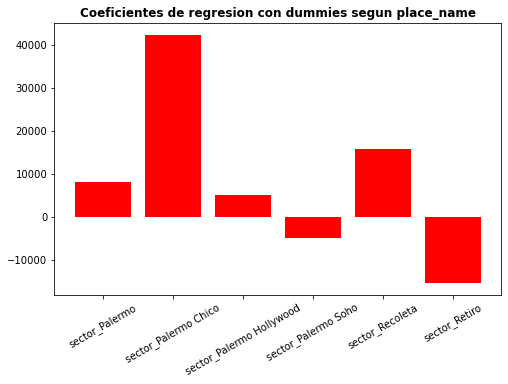

In [77]:
fig=plt.figure(figsize=(8,5))
plt.bar(feature_cols[1:7],linreg.coef_[1:7], color='red')
plt.xticks(rotation=30);
plt.title('Coeficientes de regresion con dummies segun place_name',fontweight='bold',size=12)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, shuffle=False)
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)

In [79]:
print ('MAE:', mean_absolute_error(y_train, y_pred).round(2))
print ('MSE:', mean_squared_error(y_train, y_pred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)).round(2))
print ('R2:', r2_score(y_train, y_pred).round(2))

MAE: 31352.47
MSE: 1751517556.4
RMSE: 41851.14
R2: 0.82


In [80]:
cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=4).mean()

0.8054720896691828

In [81]:
cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=4).std()

0.018991470020855692

In [82]:
feature_cols = ['surface_total_in_m2', 'sector_Palermo','sector_Palermo Chico', 'sector_Palermo Hollywood', 'sector_Palermo Soho','sector_Recoleta','sector_Retiro']
X = X_train[feature_cols]
y = y_train
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1959.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:00:23   Log-Likelihood:                -31515.
No. Observations:                2613   AIC:                         6.304e+04
Df Residuals:                    2606   BIC:                         6.308e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   